In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
info_content_df = pd.read_csv('../data/interim/Info_Content.csv', index_col='ucid')
info_userdata_df = pd.read_csv('../data/interim/Info_UserData.csv', index_col='uuid')
log_problem_df = pd.read_csv('../data/interim/Log_Problem.csv', index_col='upid')

Wall time: 17.9 s


In [3]:
merge_df = log_problem_df.merge(info_userdata_df,how='left',on='uuid')

In [4]:
merge_df = merge_df.merge(info_content_df,how='left',on='ucid')

In [6]:
merge_df.head()

,datetime_attempt,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,content_pretty_name,difficulty,learning_stage,level2_id,level3_id,level4_id
0,2018-09-28 20:00:00+00:00,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,...,True,1,10,1,【基礎】倍數的應用,easy,elementary,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,2018-09-28 10:15:00+00:00,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,...,False,0,1,0,【基礎】找出最小公倍數,easy,elementary,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,2018-09-05 20:00:00+00:00,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,...,False,0,0,0,【基礎】尋找質因數,easy,elementary,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,DoAefIneFglvkxJ4Jb8VyB8JrESm9UEHtGyV4MqiwCo=
3,2018-09-14 16:30:00+00:00,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,...,False,0,2,0,【基礎】數的相關名詞介紹,easy,junior,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,/yqeM1FRP1rB9WuQWBkStMqrBQgjEexaeyWIhBC7ov4=,Vuo8t3kw/4IH80FuZ0l0uJPwpfrMs8SxhCbJA8zn3vU=
4,2018-09-13 16:00:00+00:00,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,...,False,0,3,0,【基礎】大數的加減,easy,elementary,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,hq6uCe9NmtCc+0wlbGGIsxegP2cqYAdFebGd+v4/o8Q=


In [9]:
content_correct = merge_df.groupby('ucid')['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
content_correct.head()

,ucid,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,0.481413
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0.496226
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0.676692
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,0.642150
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,0.628628


In [10]:
content_correct.rename(columns={'is_correct': 'content_correct_rate'}, inplace=True)

In [11]:
info_content_df = pd.merge(info_content_df, content_correct, how='left', on=['ucid'])

In [13]:
info_content_df.head()

,ucid,content_pretty_name,difficulty,learning_stage,level2_id,level3_id,level4_id,content_correct_rate
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,easy,elementary,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.670543
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,easy,elementary,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.614334
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,easy,elementary,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.623229
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,easy,elementary,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.684831
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,easy,elementary,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.710526


In [14]:
info_content_df['content_correct_rate'].describe()

count    1315.000000
mean        0.662686
std         0.145005
min         0.000000
25%         0.562178
50%         0.678512
75%         0.767450
max         1.000000
Name: content_correct_rate, dtype: float64

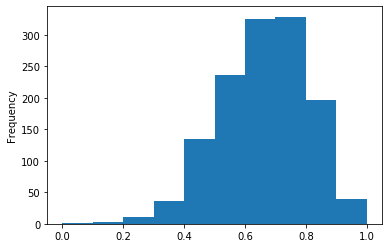

In [15]:
info_content_df['content_correct_rate'].plot.hist()

In [17]:
problem_correct = log_problem_df.groupby(['ucid','problem_number'])['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()
problem_correct.head()

,ucid,problem_number,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,1,0.561404
1,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,2,0.528302
2,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,3,0.627451
3,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,4,0.521739
4,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,5,0.522727


In [18]:
problem_correct.rename(columns={'is_correct': 'problem_correct_rate'}, inplace=True)